# **Project**
In this project, our aim is to building a model for predicting wine qualities. Our label will be quality column. **Do not forget, this is a Classification problem!**

# **Steps**

* Read the winequality.csv file and describe it.
* Make at least 4 different analysis on Exploratory Data Analysis section.
* Pre-process the dataset to get ready for ML application. (Check missing data and handle them, can we need to do scaling or feature extraction etc.)
* Define appropriate evaluation metric for our case (classification).
Train and evaluate Decision Trees and at least 2 different appropriate algorithm which you can choose from scikit-learn library.
* Check if is there any overfitting and underfitting. Interpret your results and try to overcome if there is any problem in a new section.
* Create confusion metrics for each algorithm and display Accuracy, Recall, Precision and F1-Score values.
* Analyse and compare results of 3 algorithms.
Select best performing model based on evaluation metric you chose on test dataset.



# **CANAY TAŞAR**

In [530]:
# Read the winequality.csv file and describe it.
import pandas as pd
import numpy as np
data = pd.read_csv('https://raw.githubusercontent.com/canaytsr/GlobalAIHubMLCourse/main/Final%20Project/winequality.csv')
#print(data)
print(data.head)
print(data.info())
print(data.describe())

#Missing Values
print(data.dropna())
print(data.isnull().sum())


<bound method NDFrame.head of       fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0               7.4             0.700         0.00  ...       0.56      9.4        5
1               7.8             0.880         0.00  ...       0.68      9.8        5
2               7.8             0.760         0.04  ...       0.65      9.8        5
3              11.2             0.280         0.56  ...       0.58      9.8        6
4               7.4             0.700         0.00  ...       0.56      9.4        5
...             ...               ...          ...  ...        ...      ...      ...
1594            6.2             0.600         0.08  ...       0.58     10.5        5
1595            5.9             0.550         0.10  ...       0.76     11.2        6
1596            6.3             0.510         0.13  ...       0.75     11.0        6
1597            5.9             0.645         0.12  ...       0.71     10.2        5
1598            6.0             0.3

In [531]:
from pprint import pprint
import plotly.graph_objs as go

from pandas.plotting import scatter_matrix

from matplotlib.colors import ListedColormap
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

from sklearn import model_selection

In [532]:
data.groupby(by="quality").count()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,10,10,10,10,10,10,10,10,10,10,10
4,53,53,53,53,53,53,53,53,53,53,53
5,681,681,681,681,681,681,681,681,681,681,681
6,638,638,638,638,638,638,638,638,638,638,638
7,199,199,199,199,199,199,199,199,199,199,199
8,18,18,18,18,18,18,18,18,18,18,18


#**Exploratory Data Analysis** 


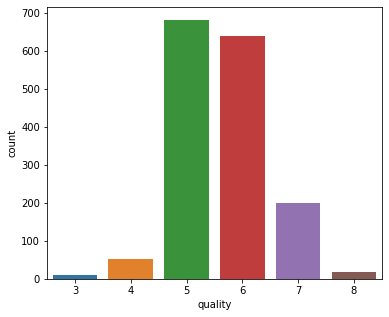

In [533]:
# Our label distribution (countplot)
from plotly.offline import iplot
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 5))
sns.countplot(x ='quality', data = data)
plt.show()

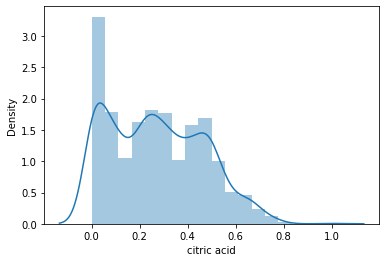

In [534]:
# Example EDA (distplot)
import seaborn as sns, numpy as np
sns.distplot(data['citric acid'])           
plt.show()

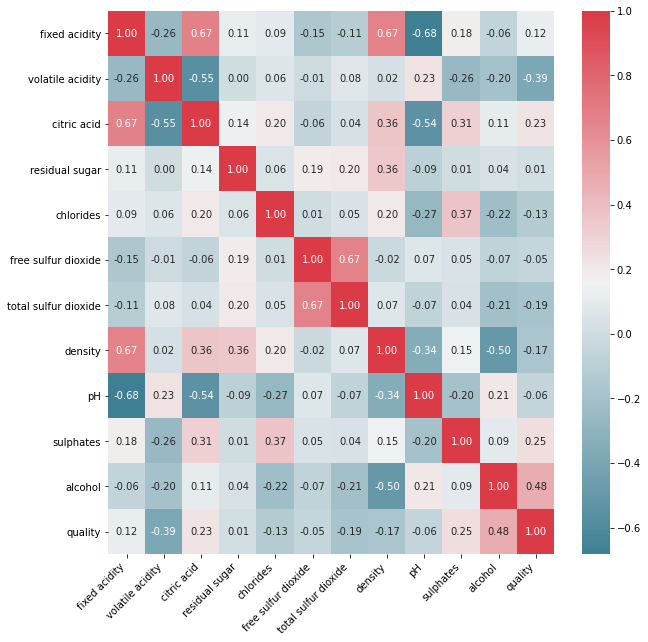

In [535]:
colum_names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
correlations = data.corr()

fig, ax = plt.subplots(figsize=(10, 10))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(correlations, cmap=colormap, annot=True, fmt=".2f")
ax.set_xticklabels(colum_names,rotation=45,horizontalalignment='right');
ax.set_yticklabels(colum_names);
plt.show()


# **Preprocessing**

In [536]:
print(data.duplicated())#True value for each duplicated row
data.drop_duplicates()

0       False
1       False
2       False
3       False
4        True
        ...  
1594    False
1595    False
1596     True
1597    False
1598    False
Length: 1599, dtype: bool


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [537]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score

label_quality = LabelEncoder()
# Bad becomes 0 and good becomes 1
data['quality'] = label_quality.fit_transform(data['quality'])
data['quality'].value_counts()

X = data.drop('quality', axis=1)
y = data['quality']

In [538]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test=train_test_split(X, y,train_size=0.7, test_size=0.3, random_state=40) 
X_test


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1035,10.1,0.37,0.34,2.4,0.085,5.0,17.0,0.99683,3.17,0.65,10.6
49,5.6,0.31,0.37,1.4,0.074,12.0,96.0,0.99540,3.32,0.58,9.2
799,9.4,0.50,0.34,3.6,0.082,5.0,14.0,0.99870,3.29,0.52,10.7
538,12.9,0.35,0.49,5.8,0.066,5.0,35.0,1.00140,3.20,0.66,12.0
660,7.2,0.52,0.07,1.4,0.074,5.0,20.0,0.99730,3.32,0.81,9.6
...,...,...,...,...,...,...,...,...,...,...,...
26,7.6,0.41,0.24,1.8,0.080,4.0,11.0,0.99620,3.28,0.59,9.5
1152,8.3,0.60,0.25,2.2,0.118,9.0,38.0,0.99616,3.15,0.53,9.8
868,6.8,0.56,0.22,1.8,0.074,15.0,24.0,0.99438,3.40,0.82,11.2
686,7.1,0.65,0.18,1.8,0.070,13.0,40.0,0.99700,3.44,0.60,9.1


In [539]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
X_test

array([[ 0.98155643, -0.8662908 ,  0.34794682, ..., -0.87537342,
        -0.08154985,  0.10962118],
       [-1.5557364 , -1.20167425,  0.50330913, ...,  0.09906823,
        -0.49421173, -1.1439029 ],
       [ 0.58686644, -0.13962665,  0.34794682, ..., -0.0958201 ,
        -0.84792192,  0.19915861],
       ...,
       [-0.87912498,  0.1957568 , -0.27350239, ...,  0.61877045,
         0.92062901,  0.64684579],
       [-0.70997213,  0.69883198, -0.48065212, ...,  0.87862155,
        -0.37630834, -1.23344034],
       [ 1.15070929, -1.48116046,  1.0729709 , ...,  0.16403101,
         1.2153875 ,  0.37823348]])

In [542]:
corr_matrix = data.corr()
print(corr_matrix["quality"].sort_values(ascending=False))

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


# **ML Application**

In [543]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [544]:
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, mean_absolute_error
from warnings import simplefilter

# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

SupportVector: 0.605922 (0.017896)
DecisionTree: 0.551369 (0.015559)
KNeighbors: 0.555830 (0.027567)
AdaBoost: 0.522754 (0.026447)
Logistic: 0.598767 (0.012824)


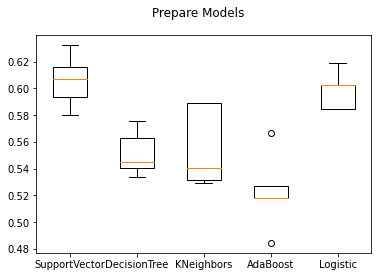

In [545]:
from sklearn import preprocessing
#scaler = preprocessing.StandardScaler().fit(X_train)
#X_scaled.std(axis=0)

#min_max_scaler = preprocessing.MinMaxScaler()
#X_train_minmax = min_max_scaler.fit_transform(X_train)

seed = 5
# prepare models
models = []
#SupportVectorClassifier
models.append(('SupportVector', SVC()))
#DecisionTreeClassifier
models.append(('DecisionTree', DecisionTreeClassifier()))
#KNeighborsClassifier
models.append(('KNeighbors', KNeighborsClassifier()))
#AdaBoostClassifier
models.append(('AdaBoost', AdaBoostClassifier()))
#LogisticRegression
models.append(('Logistic', LogisticRegression()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=5, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Prepare Models')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


In [547]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=15, random_state=0)
clf.fit(X_train, y_train)
print("Accuracy of train:",clf.score(X_train,y_train))
print("Accuracy of test:",clf.score(X_test,y_test))
print("\nBias for training:",1-clf.score(X_train,y_train))
print("Bias for test:",1-clf.score(X_test,y_test))
print("\nVariance:",(1-clf.score(X_test,y_test))-(1-clf.score(X_train,y_train)))



Accuracy of train: 0.9874888293118856
Accuracy of test: 0.5770833333333333

Bias for training: 0.01251117068811436
Bias for test: 0.4229166666666667

Variance: 0.41040549597855236


Underfitting problem (High bias and low variance)

In [548]:
pred = clf.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00        14
           2       0.65      0.66      0.66       199
           3       0.59      0.57      0.58       193
           4       0.51      0.57      0.54        61
           5       0.00      0.00      0.00         8

    accuracy                           0.58       480
   macro avg       0.29      0.30      0.30       480
weighted avg       0.57      0.58      0.57       480



In [549]:
print("Precision = {}".format(precision_score(y_test, pred, average='macro')))
print("Recall = {}".format(recall_score(y_test, pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, pred)))
print("F1 Score = {}".format(f1_score(y_test, pred,average='macro')))

Precision = 0.2909696843874952
Recall = 0.30117254354105816
Accuracy = 0.5770833333333333
F1 Score = 0.2957072457828442


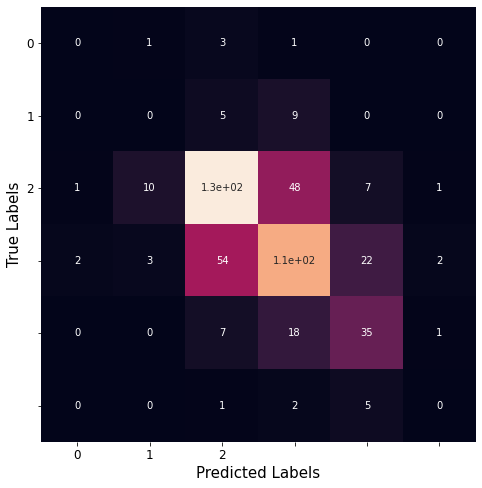

In [550]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data["Label"] = label_encoder.fit_transform(data["quality"]) 
data["Label"].value_counts()
categories = list(label_encoder.inverse_transform([0, 1, 2]))
cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(categories, fontsize = 12)
ax.yaxis.set_ticklabels(categories, fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

In [551]:
svc = SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

print("Accuracy of train:",svc.score(X_train,y_train))
print("Accuracy of test:",svc.score(X_test,y_test),"\n")

Accuracy of train: 0.6738159070598749
Accuracy of test: 0.6291666666666667 



In [552]:
def svc_param_selection(X, y, nfolds):
    param = {
        'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
        'kernel': ['linear', 'rbf'],
        'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4]
    }
    grid_search = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=nfolds)
    grid_search.fit(X,  y)
    return grid_search.best_params_

In [553]:
svc_param_selection(X_train, y_train,5)


{'C': 1.1, 'gamma': 0.8, 'kernel': 'rbf'}

In [554]:
import sklearn.metrics as metrics
metrics.f1_score(y_test, pred_svc2, average='macro', labels=np.unique(pred_svc2))

0.6051787477236787

In [555]:

clf.fit(X_train, y_train)
print("Accuracy of train:",clf.score(X_train,y_train))

svc2 = SVC(C = 1.1, gamma =  0.8, kernel= 'rbf')
svc2.fit(X_train, y_train)
pred_svc2 = svc2.predict(X_test)
print('Confusion matrix')
print(confusion_matrix(y_test, pred_svc2))
print('Classification report')
print(classification_report(y_test, pred_svc2))
print('Accuracy score',accuracy_score(y_test, pred_svc2),"\n")


Accuracy of train: 0.9874888293118856
Confusion matrix
[[  0   0   4   1   0   0]
 [  0   0  11   3   0   0]
 [  0   0 154  45   0   0]
 [  0   0  57 130   6   0]
 [  0   0   9  31  21   0]
 [  0   0   3   4   1   0]]
Classification report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00        14
           2       0.65      0.77      0.70       199
           3       0.61      0.67      0.64       193
           4       0.75      0.34      0.47        61
           5       0.00      0.00      0.00         8

    accuracy                           0.64       480
   macro avg       0.33      0.30      0.30       480
weighted avg       0.61      0.64      0.61       480

Accuracy score 0.6354166666666666 



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [556]:
#Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=200, max_depth=20,random_state=0)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [565]:
#KNeighborsClassifier
n_neighbors = 2

for weights in ['uniform', 'distance']:
    nbrs = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights)
    nbrs.fit(X_train,y_train)
    pred_nbrs = nbrs.predict(X_test)
    print('KNeighborsClassifier', weights)
    print(classification_report(y_test, pred_nbrs))

KNeighborsClassifier uniform
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.04      0.07      0.05        14
           2       0.61      0.78      0.69       199
           3       0.59      0.52      0.55       193
           4       0.57      0.28      0.37        61
           5       0.00      0.00      0.00         8

    accuracy                           0.57       480
   macro avg       0.30      0.27      0.28       480
weighted avg       0.57      0.57      0.56       480

KNeighborsClassifier distance
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00        14
           2       0.68      0.72      0.70       199
           3       0.62      0.60      0.61       193
           4       0.50      0.51      0.50        61
           5       0.00      0.00      0.00         8

    accuracy      

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [558]:
#AdaBoostClassifier
ada_classifier = AdaBoostClassifier(n_estimators=100)
ada_classifier.fit(X_train, y_train)
pred_ada = ada_classifier.predict(X_test)

In [559]:
#Evaluate model
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(mean_absolute_error(test_labels,predictions)))
    print('Accuracy = {:0.2f}%.'.format(accuracy_score(test_labels,predictions)*100))

    

In [560]:
evaluate(svc,X_test,y_test)
evaluate(svc2,X_test,y_test)
evaluate(rfc,X_test,y_test)
evaluate(ada_classifier,X_test,y_test)

Model Performance
Average Error: 0.4042 degrees.
Accuracy = 62.92%.
Model Performance
Average Error: 0.4229 degrees.
Accuracy = 63.54%.
Model Performance
Average Error: 0.3438 degrees.
Accuracy = 69.38%.
Model Performance
Average Error: 0.4979 degrees.
Accuracy = 55.62%.


In [561]:
#Cross Validation
scores = cross_val_score(ada_classifier,X_test,y_test, cv=5)
scores.mean()

0.4875

# **Evaluation**

Box plots of (SVC ,RFC )algorithm’s close together that corresponds to the high density of accuracy scores.
Best performing model RFC. 